In [1]:
import pandas as pd

file_path = r"C:\Users\Krish\OneDrive\Desktop\Python\Datasets\weatherAUS.csv"

data =  pd.read_csv(file_path)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [2]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

C:\Users\Krish\AppData\Local\Temp\ipykernel_18904\1229360362.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
C:\Users\Krish\AppData\Local\Temp\ipykernel_18904\1229360362.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['RainTo

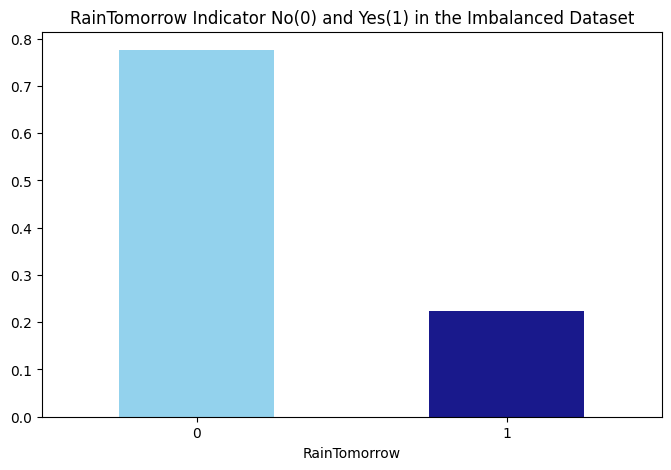

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

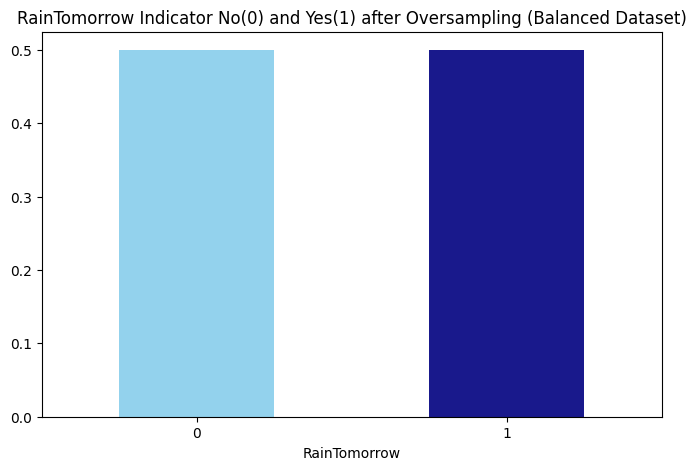

In [4]:
from sklearn.utils import resample

no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<Axes: >

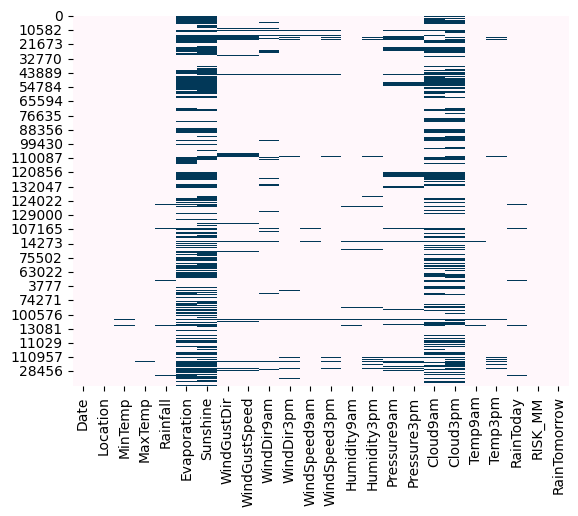

In [5]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [6]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


In [7]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [8]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [11]:
MiceImputed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396,2,13.4,22.9,0.6,5.735438,7.364116,13,44.0,13,...,22.0,1007.7,1007.1,8.000000,4.868720,16.9,21.8,0.0,0.0,0
1,397,2,7.4,25.1,0.0,5.639582,11.470601,14,44.0,6,...,25.0,1010.6,1007.8,1.734671,2.639541,17.2,24.3,0.0,0.0,0
2,398,2,12.9,25.7,0.0,7.762987,12.281872,15,46.0,13,...,30.0,1007.6,1008.7,1.820254,2.000000,21.0,23.2,0.0,0.0,0
3,399,2,9.2,28.0,0.0,5.977338,11.743982,4,24.0,9,...,16.0,1017.6,1012.8,1.236006,2.133027,18.1,26.5,0.0,1.0,0
4,400,2,17.5,32.3,1.0,6.852950,5.756442,13,41.0,1,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0


In [12]:
MiceImputed.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [13]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.119679
Sunshine            5.947404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.681346
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [14]:
# Removing outliers from dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156852, 24)

In [15]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.115284,0.041667,0.543417,0.514778,0.432327,0.569942,0.502581,0.866667,0.521127,0.866667,...,0.220253,0.245714,0.298295,0.866337,0.420182,0.506775,0.530612,0.247121,0.000000,0.0
1,0.115575,0.041667,0.375350,0.568966,0.369252,0.564016,0.741068,0.933333,0.521127,0.400000,...,0.250243,0.328571,0.318182,0.338787,0.227798,0.514905,0.594388,0.247121,0.000000,0.0
2,0.115866,0.041667,0.529412,0.583744,0.369252,0.695290,0.788183,1.000000,0.549296,0.866667,...,0.300227,0.242857,0.343750,0.345994,0.172605,0.617886,0.566327,0.247121,0.000000,0.0
3,0.116157,0.041667,0.425770,0.640394,0.369252,0.584897,0.756945,0.266667,0.239437,0.600000,...,0.160272,0.528571,0.460227,0.296799,0.184085,0.539295,0.650510,0.247121,0.076923,0.0
4,0.116448,0.041667,0.658263,0.746305,0.474377,0.639029,0.409215,0.866667,0.478873,0.066667,...,0.330217,0.334286,0.267045,0.782136,0.690418,0.531165,0.732143,0.247121,0.015385,0.0


In [16]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00205993 0.00215407 0.00259089 0.00367568 0.0102656  0.00252838
 0.05894157 0.00143001 0.00797518 0.00177178 0.00167654 0.0014278
 0.00187743 0.00760691 0.03091966 0.00830365 0.01193018 0.02113544
 0.04962418 0.00270103 0.00513723 0.00352198 0.76074491]


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                        'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                        'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                        'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [32]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, roc_auc_score, cohen_kappa_score, 
                             ConfusionMatrixDisplay, roc_curve, classification_report, confusion_matrix)

# Function to plot the ROC curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()

    # Fit the model
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0

    print(f"Accuracy = {accuracy * 100:.2f}%")
    print(f"ROC Area under Curve = {roc_auc}")
    print(f"Cohen's Kappa = {coh_kap}")
    print(f"Time taken = {time_taken} seconds")
    print(classification_report(y_test, y_pred, digits=5))

    # ROC Curve
    probs = model.predict_proba(X_test)  
    probs_class_X = probs[:, 1]  # Probabilities for rain (class label 1)
    
    # Print probability of Rain occurring
    print("Chances of Rain occurring for each prediction:")
    for i, prob in enumerate(probs_class_X):
        print(f"Sample {i+1}: {prob * 100:.2f}%")

    # Plot the ROC curve
    fper, tper, thresholds = roc_curve(y_test, probs_class_X)
    plot_roc_cur(fper, tper)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # True negatives, False positives, False negatives, True positives
    tn, fp, fn, tp = cm.ravel()

    # Calculate percentages
    total_predictions = tn + fp + fn + tp
    tn_percent = (tn / total_predictions) * 100
    fp_percent = (fp / total_predictions) * 100
    fn_percent = (fn / total_predictions) * 100
    tp_percent = (tp / total_predictions) * 100

    print(f"True Negatives: {tn} ({tn_percent:.2f}%)")
    print(f"False Positives: {fp} ({fp_percent:.2f}%)")
    print(f"False Negatives: {fn} ({fn_percent:.2f}%)")
    print(f"True Positives: {tp} ({tp_percent:.2f}%)")

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)

    return model, accuracy, roc_auc, coh_kap, time_taken


Accuracy = 95.98%
ROC Area under Curve = 0.961154451032155
Cohen's Kappa = 0.9160966204270719
Time taken = 13.003937482833862 seconds
              precision    recall  f1-score   support

           0    0.97853   0.95519   0.96672     23948
           1    0.93224   0.96711   0.94936     15265

    accuracy                        0.95983     39213
   macro avg    0.95538   0.96115   0.95804     39213
weighted avg    0.96051   0.95983   0.95996     39213

Chances of Rain occurring for each prediction:
Sample 1: 96.78%
Sample 2: 1.46%
Sample 3: 96.15%
Sample 4: 100.00%
Sample 5: 0.02%
Sample 6: 99.86%
Sample 7: 85.34%
Sample 8: 0.00%
Sample 9: 99.76%
Sample 10: 0.94%
Sample 11: 0.02%
Sample 12: 0.54%
Sample 13: 99.83%
Sample 14: 0.00%
Sample 15: 97.18%
Sample 16: 100.00%
Sample 17: 0.58%
Sample 18: 0.01%
Sample 19: 0.00%
Sample 20: 0.10%
Sample 21: 0.00%
Sample 22: 99.82%
Sample 23: 99.95%
Sample 24: 0.02%
Sample 25: 0.01%
Sample 26: 0.00%
Sample 27: 0.00%
Sample 28: 0.05%
Sample 29: 0

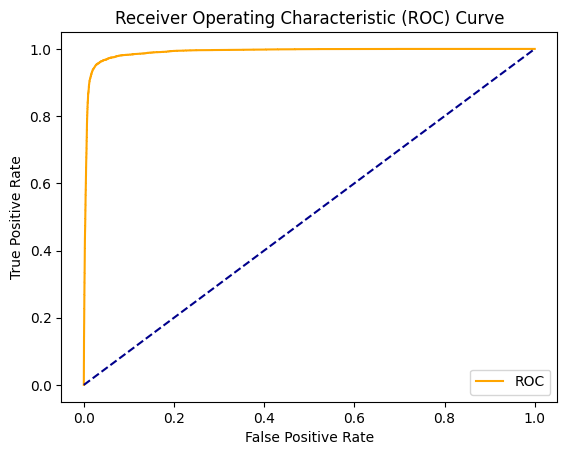

True Negatives: 22875 (58.34%)
False Positives: 1073 (2.74%)
False Negatives: 502 (1.28%)
True Positives: 14763 (37.65%)


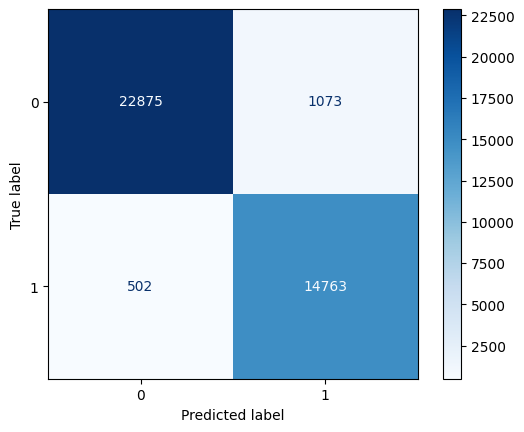

In [33]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)